<h1 align=center style="line-height:300%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پروژه دوم درس داده کاوی
</font>
</h1>
<h3 align=center style="line-height:100%;font-family:vazir;color:#0099cc">
استاد درس: دکتر ناظرفرد
</h3>
<h5 align=center style="font-size: 20px;line-height:100%;font-family:vazir;color:#0099cc">
طراح تمرین عملی: فرهاد امان  
    </h5>

## Importing Libraries

In [3]:
import sklearn as sk
import sklearn.preprocessing as pre
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Loading Data to Pandas DataFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Workspace/university/real-estate.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Droping Unnecessary Columns

In [6]:
print(df.columns.tolist())

['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
to_drop = ['No', 'X1 transaction date', 'X3 distance to the nearest MRT station']
df = df.drop(columns=to_drop)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
print(df.columns.tolist())

['X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Splitting Data to Train and Test

In [9]:
X = df[['X2 house age', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
print (f'train({len(y_train)}) + test({len(y_test)}) = {len(y)}')

print(y.head())
print(y_train.head())

train(331) + test(83) = 414
0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64
192    42.7
234    23.9
5      32.1
45     38.3
245    40.8
Name: Y house price of unit area, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Visualizing Data Distribution and Correlation

### Histogram

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


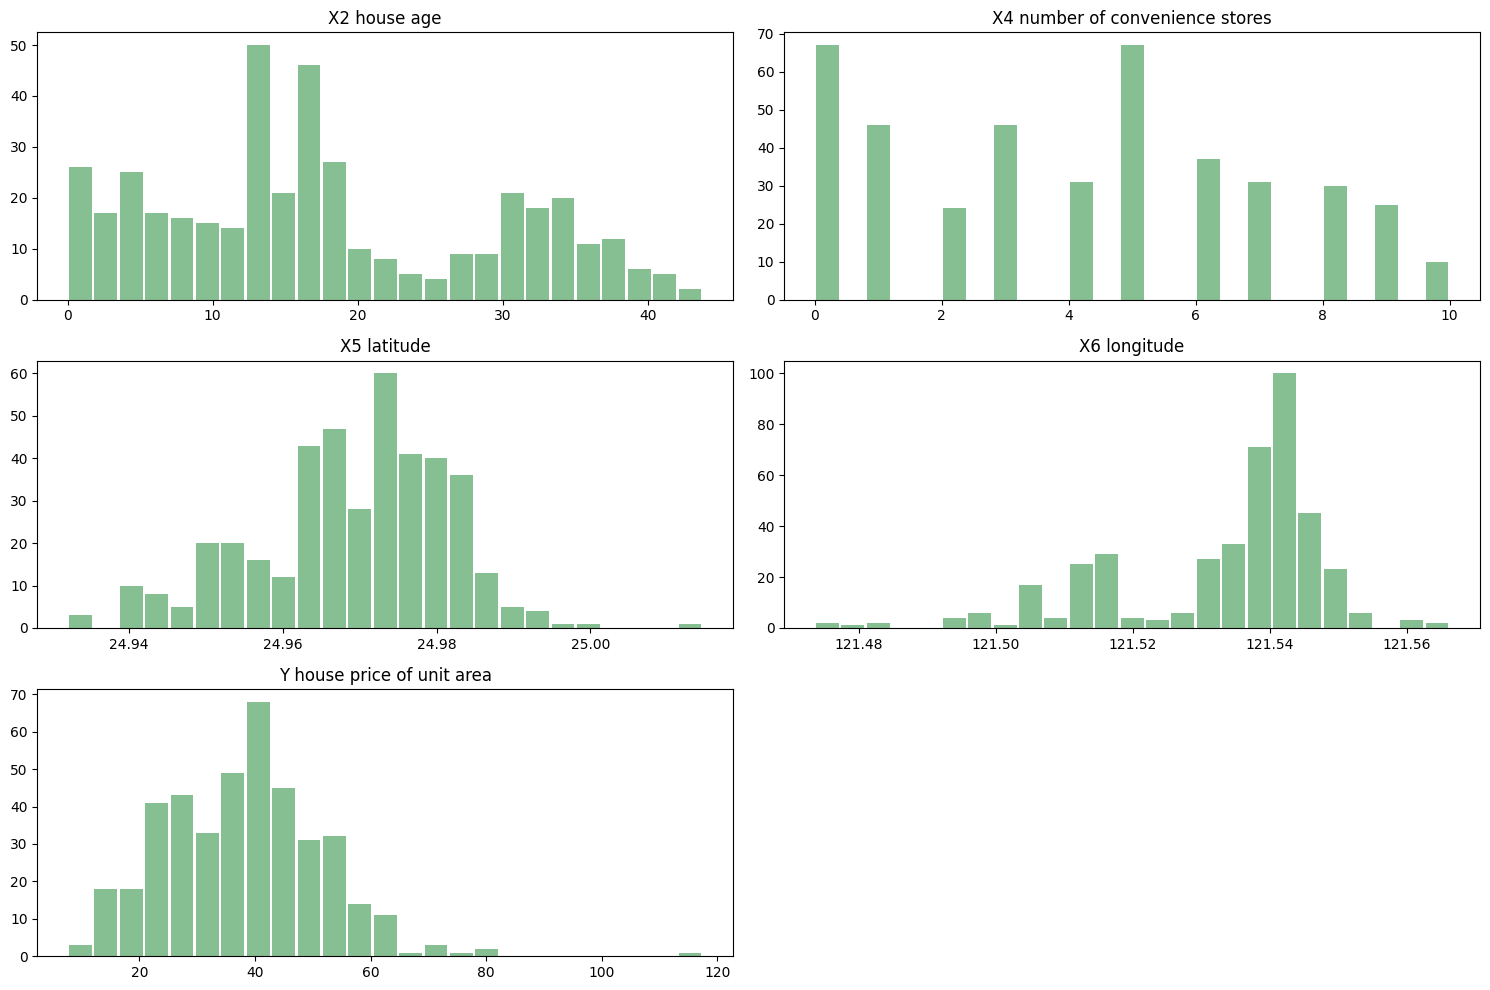

In [11]:
df.hist(figsize=(15,10), bins=25, grid=False, color='#86bf91', zorder=2, rwidth=0.9)
plt.tight_layout()
plt.show()

### pairplot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


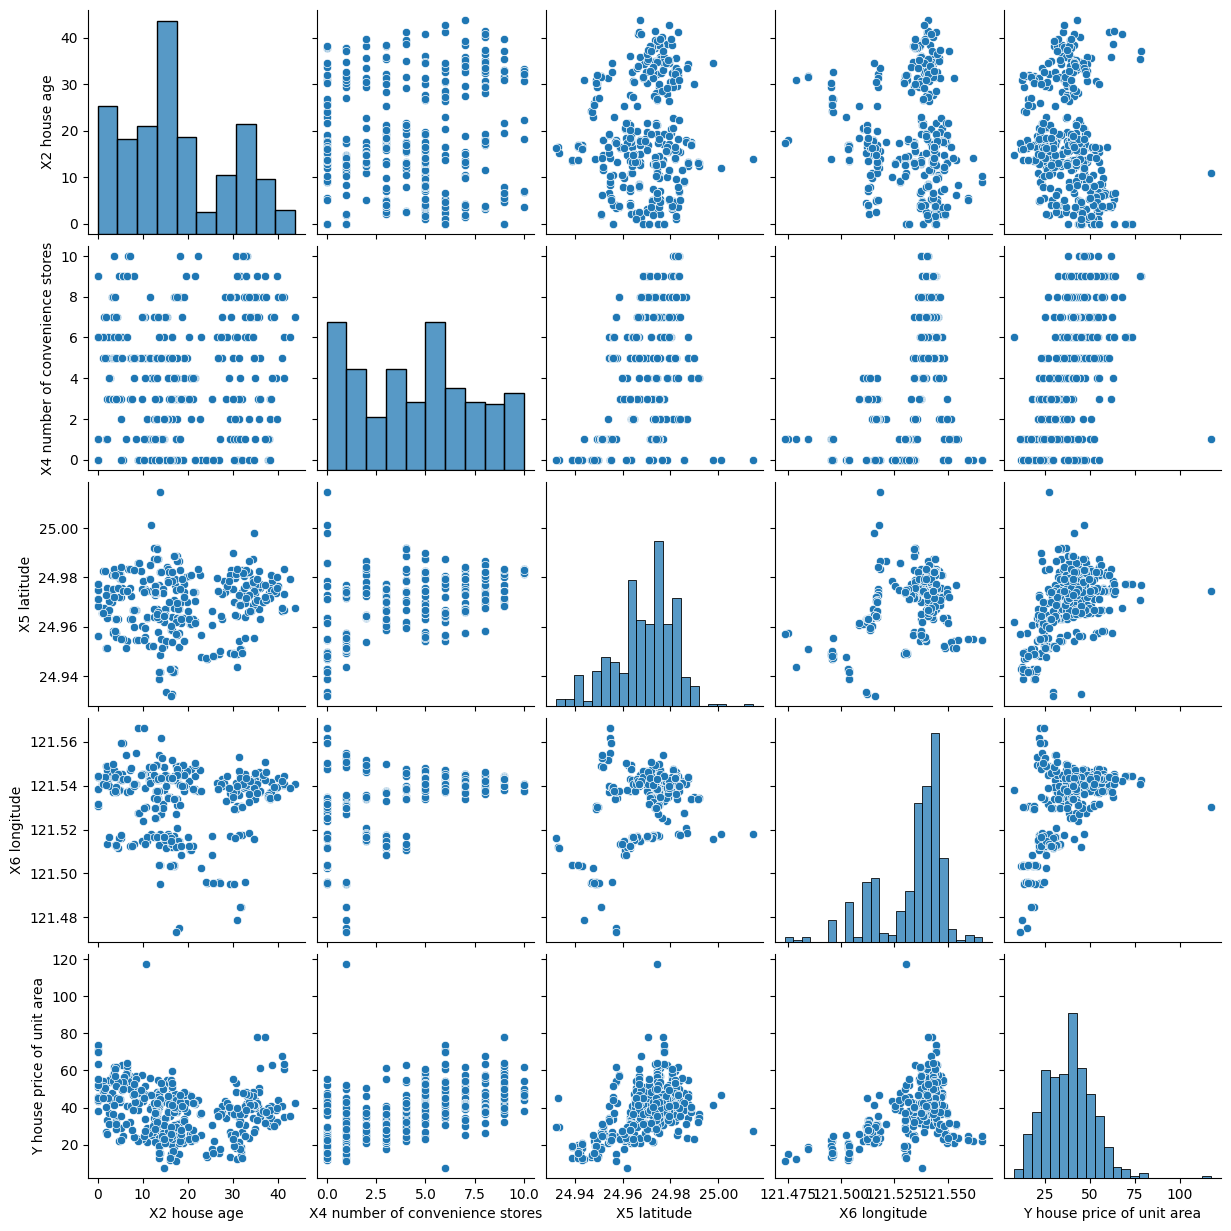

In [12]:
sns.pairplot(df)
plt.show()

### correlation heatmap


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


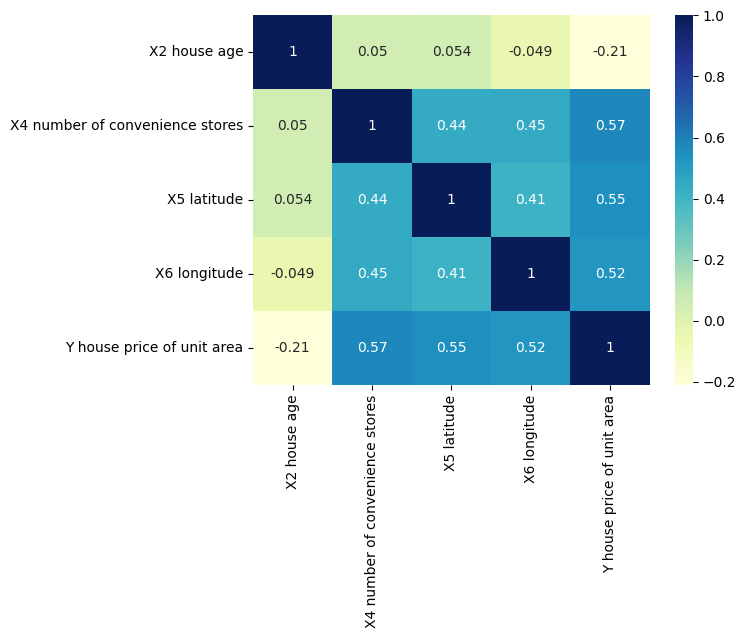

In [13]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Linear Regression

In [14]:
# to prevent high numbers
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
def evaluation(test, pred):
    mse = mean_squared_error(test, pred)
    r2 = r2_score(test, pred)

    print(f'MSE: {mse}')
    print(f'r2 score: {r2}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

print(f"linear regression with coefficients: {reg.coef_}")
evaluation(y_test, y_pred)

linear regression with coefficients: [-3.14683416  4.64011054  4.22395721  2.91076463]
MSE: 57.75527955240695
r2 score: 0.6557262308811187


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Polynomial Regression

In [17]:
# degree 2 train and test data
poly = PolynomialFeatures(degree=2)
X_train_poly2D = poly.fit_transform(X_train)
X_test_poly2D = poly.transform(X_test)

reg2D = LinearRegression()
reg2D.fit(X_train_poly2D, y_train)
y_pred = reg2D.predict(X_test_poly2D)
print('polynomial regretion 2D:')
evaluation(y_test, y_pred)


polynomial regretion 2D:
MSE: 41.848867585356054
r2 score: 0.7505428509978171


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Ridge Regression

In [18]:
clf = Ridge(alpha=0.6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('ridge regression:')
evaluation(y_test, y_pred)

ridge regression:
MSE: 57.766894438957145
r2 score: 0.6556569956388775


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Lasso Regression

In [19]:
clf = Lasso(alpha=0.5)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('lasso regression:')
evaluation(y_test, y_pred)

lasso regression:
MSE: 59.428995429683404
r2 score: 0.6457493685410928


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Elastic Net Regression

In [20]:
regr = ElasticNet(random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('elastic net regression:')
evaluation(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


elastic net regression:
MSE: 69.6247676324689
r2 score: 0.5849733329555427


## XGBoost Regression

In [21]:
xgbr = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)

print('xgboost regression:')
evaluation(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


xgboost regression:
MSE: 52.234106175399354
r2 score: 0.6886374241640887


# Assosiation Rules

In [22]:
!pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# 0. Import Libraries
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# 1. Data Loading
df = pd.read_csv("/content/drive/MyDrive/Workspace/university/grocery.csv", header=None, names=['transactions'])

# 2. Preprocess Data
df['transactions'] = df['transactions'].str.split(',')
transactions = df['transactions'].tolist()

# 3. Apply TransactionEncoder
te = TransactionEncoder()
te_arr = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_arr, columns=te.columns_)
print('encoded', df_encoded)

# 4. Generate Frequent Itemsets
minsup = 0.2
frequent_itemsets = apriori(df_encoded, min_support=minsup, use_colnames=True)

# 5. Generate Association Rules
minconf = 0.6
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=minconf)

# 6. Display Rules
print('rules\n', rules)


encoded     BISCUIT  BOURNVITA  BREAD   COCK  COFFEE  CORNFLAKES    JAM  MAGGI   MILK  \
0      True      False   True  False   False       False  False  False   True   
1      True      False   True  False   False        True  False  False   True   
2     False       True   True  False   False       False  False  False  False   
3     False      False   True  False   False       False   True   True   True   
4      True      False  False  False   False       False  False   True  False   
5     False       True   True  False   False       False  False  False  False   
6     False      False  False  False   False        True  False   True  False   
7      True      False   True  False   False       False  False   True  False   
8     False      False   True  False   False       False   True   True  False   
9     False      False   True  False   False       False  False  False   True   
10     True      False  False   True    True        True  False  False  False   
11     True      Fal

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
